# Exploratory Anlaysis of Bike Sharing Dataset

### Imports

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset

In [12]:
def load_df(filename):
    '''load the dataset into the system using pandas.read_csv function
    
        Parameters:
        filename: Name of the dataset
        
        Returns:
        df: Generated dataframe'''
    
    df=pd.read_csv(filename)
    return df

In [13]:
df = load_df('E:\\Personal\\tasks\\hour.csv')

## Check for any missing data in the dataset:
### missingno is the package used here to check for the missing data.

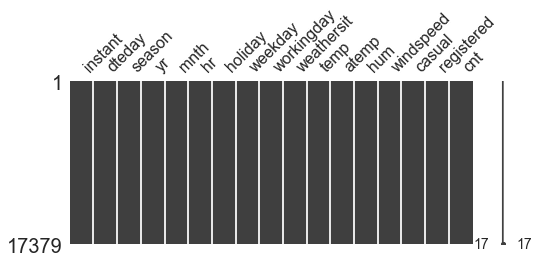

In [19]:
msno.matrix(df,figsize=(8,3))

## Plots to analyse the dataset variables:

## From the below plot we can see that more bikes are used during 08:00 and during 17:00 and 18:00

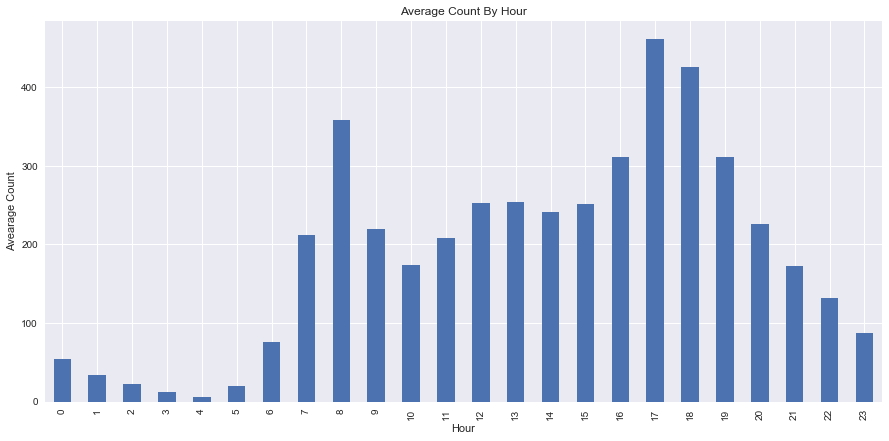

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('hr').mean()['cnt'].plot(ax=ax, kind='bar')
ax.set(xlabel='Hour', ylabel='Avearage Count',title="Average Count By Hour")
plt.show()
fig.savefig('test.png', bbox_inches='tight')

## From this we can see that there are very few bikes used in the fall.

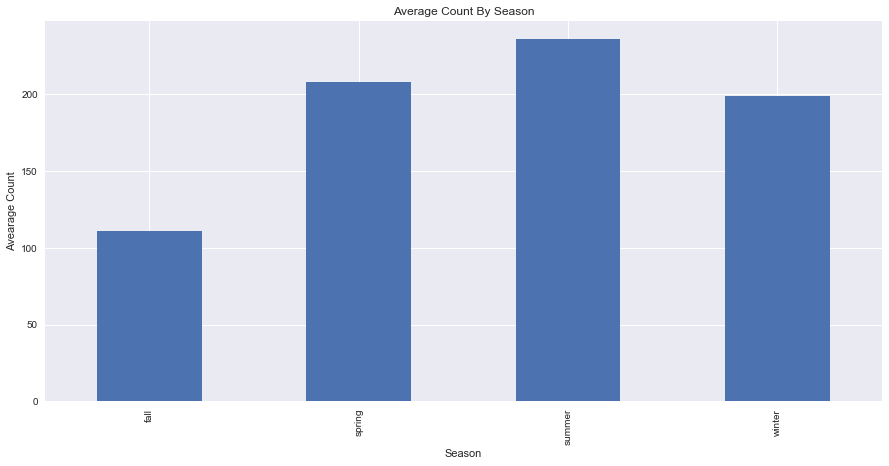

In [153]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('season').mean()['cnt'].plot(ax=ax, kind='bar')
ax.set_xticklabels(['fall','spring','summer','winter'])
ax.set(xlabel='Season', ylabel='Avearage Count',title="Average Count By Season")
plt.show()

## From the below chart we can see that average count rises during the weekend.

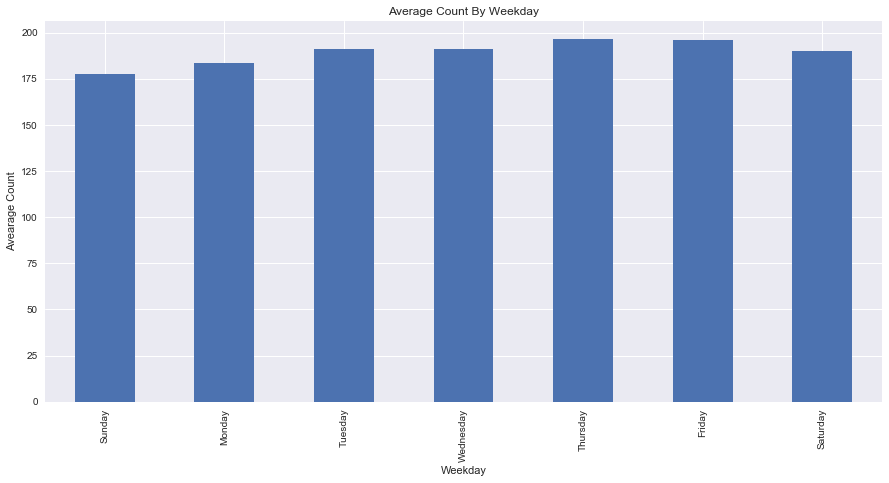

In [154]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['weekday']).mean()['cnt'].plot(ax=ax,kind='bar')
ax.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
ax.set(xlabel='Weekday', ylabel='Avearage Count',title="Average Count By Weekday")
plt.show()

## The below is the Histogram plot of the target variable i.e. 'cnt' variable from the dataset. We can see that the variable is right skewed. Hence we need to normalise the variable

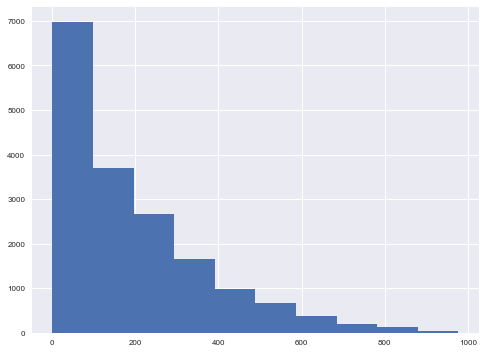

In [24]:
df['cnt'].hist(figsize=(8, 6), xlabelsize=8, ylabelsize=8);

### finding correlation between count vs all the other variables

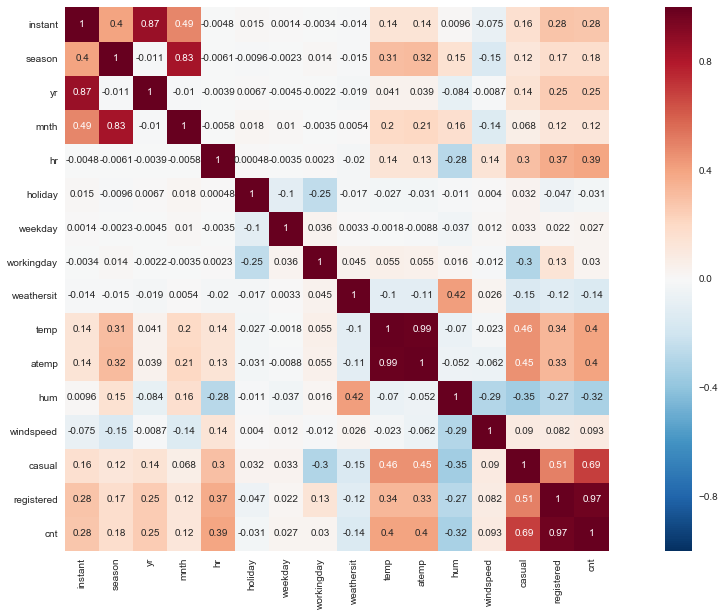

In [4]:
corr = df.corr()
fig, ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,square=True, annot=True)

## From the above analysis we can see that temp and atemp have same correlation with count hence we can remove atemp. Windspeed, holiday,weekday and workingday have very weak correlation with count. Hence they can be removed

### Mean Absolute Deviation

In [158]:
df.mad()

instant       4344.749986
season           0.987593
yr               0.499987
mnth             2.982815
hr               5.988233
holiday          0.055885
weekday          1.720869
workingday       0.433226
weathersit       0.558578
temp             0.165175
atemp            0.145324
hum              0.163311
windspeed        0.096312
casual          34.139960
registered     114.396155
cnt              1.196196
dtype: float64